# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# Required Assignment 11: What drives the car price? \n",
## Using data from the Kaggle identifying the reason for the change in the car price

***This activity focuses on producing the plots using the above mentioned dataset to support my findings***

### Importing necessary libraries

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [2]:
dfcarprice = pd.read_csv("data/vehicles.csv")

## Assignment Objectives
  Identifying the most probable reason that drives the car price using CRISP-DM process.
  
## Assessment of Data
  Provided data from car delaership contains used Car price from different Regions for
  various manufacturers, car details like models with year, Cylinders,odometer and condition.
  
  At First look many of the data seems to be null, so , we may not be able to use all the features effectively.
  ### Risks and benefits
  As this limited data will be used for analysis , it pose a risk of providing wrong assesssment to the car dealers.
  As the benefit, we will be able to use modeling techinques and try to come up with other possible results to analyze further.


### verifying 

In [3]:
#print(dfcarprice.info)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Using the provided data, 
    1. Verify and clean Data
    2. Cleanup all null values
    3. Identify features to use with modeling and their correlation to the price variation
   

In [4]:

#print(dfcarprice)

price_counts = pd.DataFrame(dfcarprice['price'])

price_counts['price_cnt'] = dfcarprice['price'].value_counts()
low_count_items = price_counts[price_counts['price_cnt'] < 3]
#print(low_count_items)
remove_lst = low_count_items['price'].tolist()
dfcarprice_filtrd = dfcarprice[~dfcarprice['price'].isin(remove_lst)]
#print(dfcarprice_filtrd)
dfcarprice_filtrd_srtd = dfcarprice_filtrd.sort_values(by=['price'],ascending=[True])

#print(dfcarprice_filtrd_srtd)
#dfcarprice_filtrd_srtd = dfcarprice_filtrd_srtd.set_index('price')
#print(dfcarprice)

In [5]:

dfcarprice_filtrd_srtd =dfcarprice_filtrd_srtd.groupby(['region','manufacturer','model','year']).filter(lambda x: len(x) >= 2)

#print(dfcarprice_filtrd_srtd)

In [14]:
dfcarprice_filtrd_srtd =dfcarprice_filtrd_srtd.groupby(['region','price','manufacturer','model','year']).filter(lambda x: len(x) >= 3)

In [15]:
print(dfcarprice_filtrd_srtd)

               id              region    year manufacturer            model  \
price                                                                         
200    7316776766               boise  2016.0      hyundai          elantra   
200    7313395084               boise  2016.0      hyundai          elantra   
200    7315383673               boise  2016.0      hyundai          elantra   
200    7314546135               boise  2016.0      hyundai          elantra   
200    7316310421               boise  2016.0      hyundai          elantra   
...           ...                 ...     ...          ...              ...   
73900  7312775956        jacksonville  2017.0         ford  f250 super duty   
73900  7316197103        jacksonville  2017.0         ford  f250 super duty   
98995  7302779934  anchorage / mat-su  2017.0      porsche   panamera turbo   
98995  7309994679  anchorage / mat-su  2017.0      porsche   panamera turbo   
98995  7316497061  anchorage / mat-su  2017.0      p

In [8]:
dfcarprice_filtrd_srtd = dfcarprice_filtrd_srtd.set_index('price')
dfcarprice_filtrd_srtd = dfcarprice_filtrd_srtd.dropna()



### Trasform all columns with categories into numeric using the 'factorize()'

In [9]:
dfcarprice_filtrd_srtd['region_n'] = pd.to_numeric(pd.factorize(dfcarprice_filtrd_srtd['region'])[0])
dfcarprice_filtrd_srtd['manufacturer_n'] = pd.to_numeric(pd.factorize(dfcarprice_filtrd_srtd['manufacturer'])[0])
dfcarprice_filtrd_srtd['model_n'] = pd.to_numeric(pd.factorize(dfcarprice_filtrd_srtd['model'])[0])
dfcarprice_filtrd_srtd['condition_n'] = pd.to_numeric(pd.factorize(dfcarprice_filtrd_srtd['condition'])[0])
dfcarprice_filtrd_srtd['cylinders'] = dfcarprice_filtrd_srtd['cylinders'].str.replace(r'[^\d.]', '', regex=True)
dfcarprice_filtrd_srtd['cylinders_n'] = pd.to_numeric(pd.factorize(dfcarprice_filtrd_srtd['cylinders'])[0])

In [10]:
print(dfcarprice_filtrd_srtd)

               id              region    year manufacturer            model  \
price                                                                         
200    7316776766               boise  2016.0      hyundai          elantra   
200    7313395084               boise  2016.0      hyundai          elantra   
200    7315383673               boise  2016.0      hyundai          elantra   
200    7314546135               boise  2016.0      hyundai          elantra   
200    7316310421               boise  2016.0      hyundai          elantra   
...           ...                 ...     ...          ...              ...   
73900  7312775956        jacksonville  2017.0         ford  f250 super duty   
73900  7316197103        jacksonville  2017.0         ford  f250 super duty   
98995  7302779934  anchorage / mat-su  2017.0      porsche   panamera turbo   
98995  7309994679  anchorage / mat-su  2017.0      porsche   panamera turbo   
98995  7316497061  anchorage / mat-su  2017.0      p

### Verified data whenever <u>there is a change in price</u> using Seaborns Joint plot correlation to different factors that affect the price.
sns.jointplot(dfcarprice,x='region_n',y='price',kind='kde')

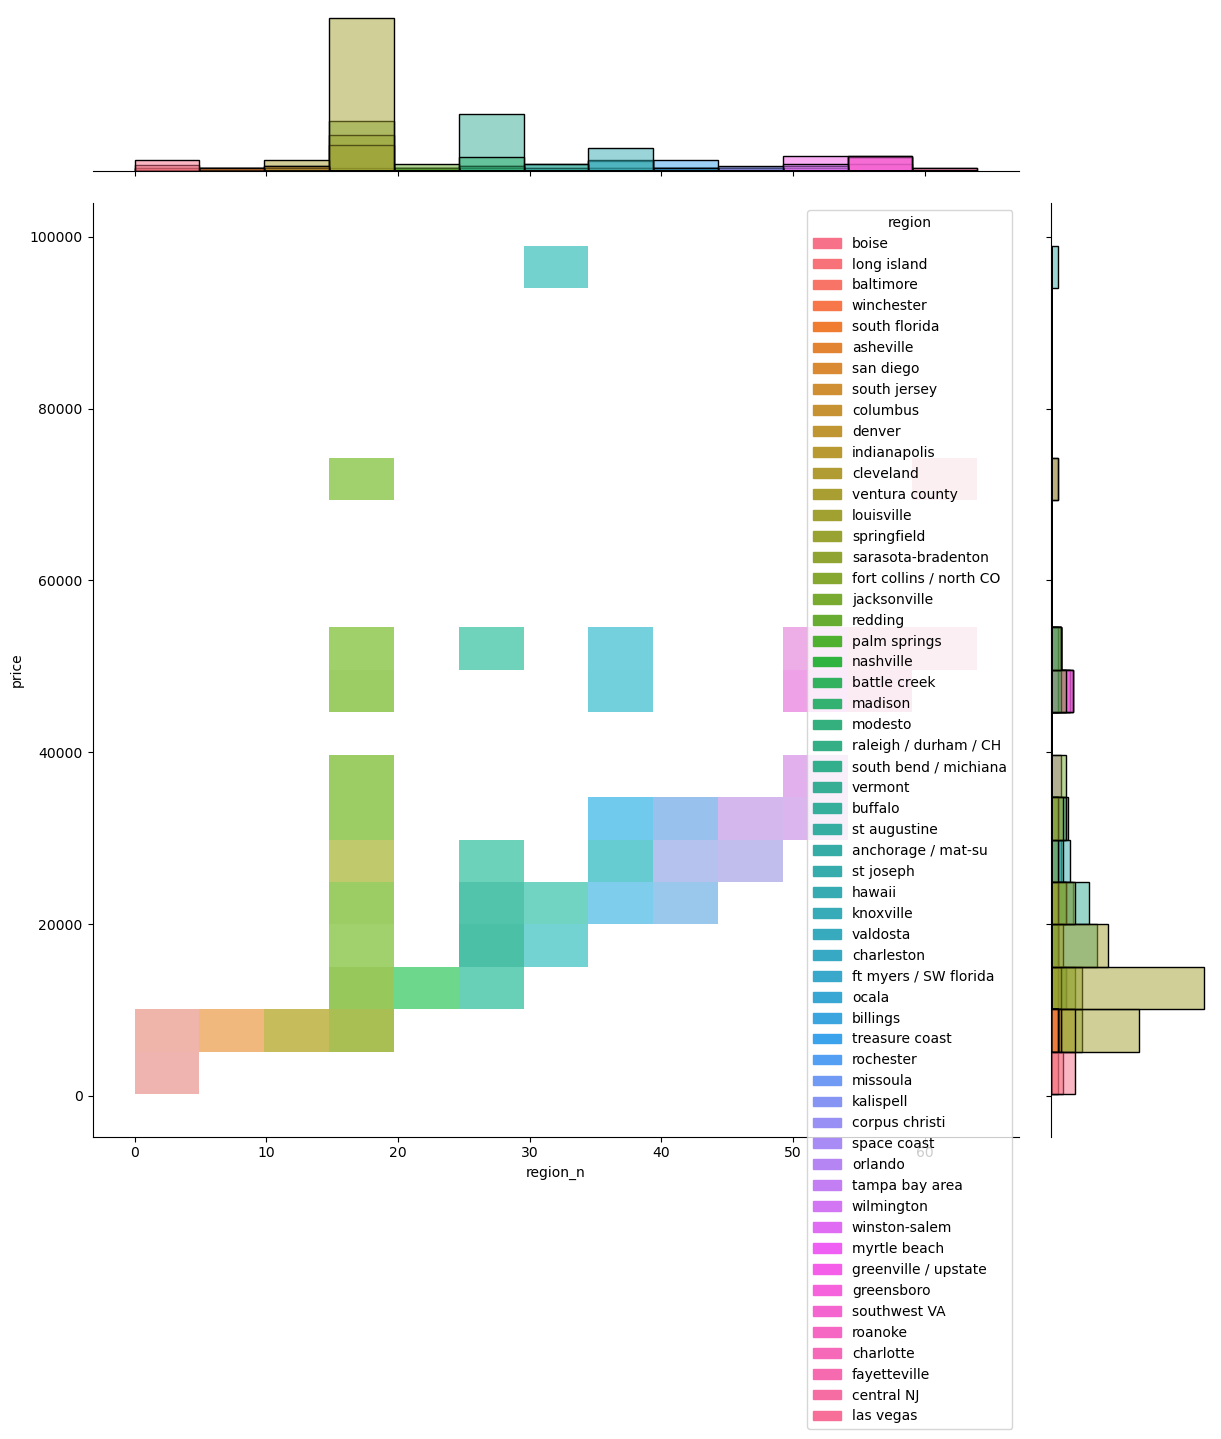

In [21]:
sns.jointplot(dfcarprice_filtrd_srtd,x='region_n',y='price',kind='hist',hue='region',height=12)

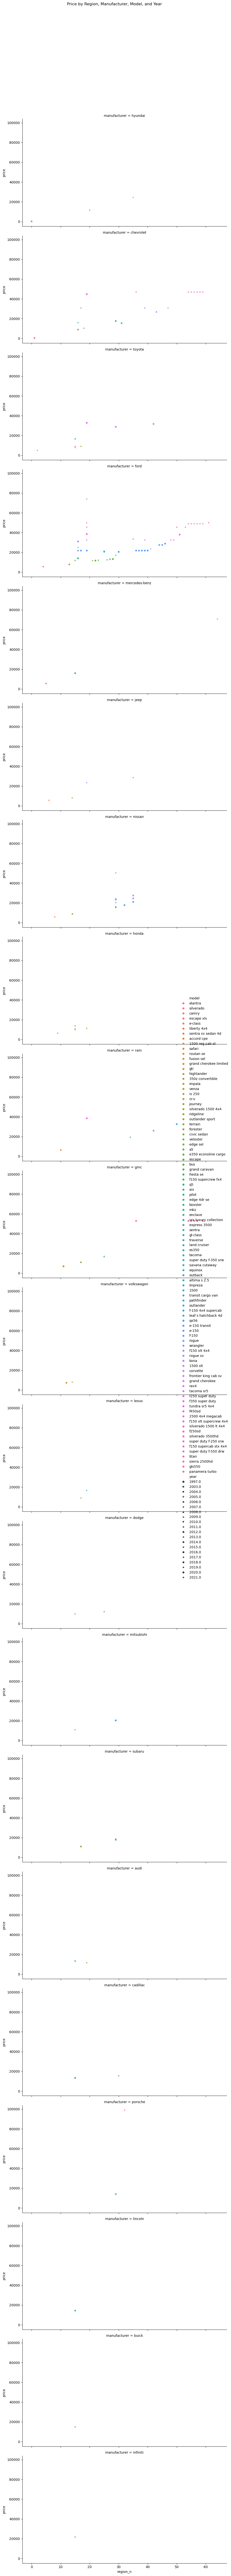

In [20]:
sns.relplot(
    data=dfcarprice_filtrd_srtd,
    x='region_n',
    y='price',
    col='manufacturer',  # Separate plots for each manufacturer
    hue='model',         # Different colors for each model within a manufacturer
    style='year',        # Different markers for each year
    kind='scatter',      # Use scatter plot for individual points
    col_wrap=1,          # Wrap columns after 2 plots for better layout
    height=5,            # Height of each facet
    aspect=1.5           # Aspect ratio of each facet
)

plt.suptitle('Price by Region, Manufacturer, Model, and Year', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjusted layout to prevent title overlap
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.